## Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten

## Importing the dataset

In [3]:
from tensorflow.keras.datasets import mnist

In [4]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

## Data visualization and preprocessing

In [5]:
print(f'X_train shape: {X_train.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'X_test shape : {X_test.shape}')
print(f'y_test shape : {y_test.shape}')

X_train shape: (60000, 28, 28)
y_train shape: (60000,)
X_test shape : (10000, 28, 28)
y_test shape : (10000,)


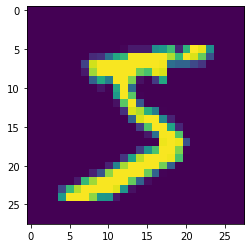

In [6]:
plt.figure()
plt.imshow(X_train[0])

In [7]:
y_train[0]

5

In [8]:
X_train = X_train/255.0
X_test = X_test/255.0

In [9]:
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

## Question - 1
##### Implement a fully connected neural network with one hidden layer in keras/tensorflow. Set the number of neurons in the hidden layer to 100. 

In [10]:
model1 = Sequential()
model1.add(Flatten(input_shape=X_train[0].shape))
model1.add(Dense(100, activation='relu'))
model1.add(Dense(10, activation='softmax'))

In [11]:
model1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 100)               78500     
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1010      
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [12]:
model1.compile(optimizer='adam', metrics=['accuracy'], loss='sparse_categorical_crossentropy')

In [13]:
history1 = model1.fit(X_train, y_train, batch_size=100, epochs=25)

Epoch 1/25
600/600 [==============================] - 2s 3ms/step - loss: 0.3508 - accuracy: 0.9038
Epoch 2/25
600/600 [==============================] - 2s 3ms/step - loss: 0.1601 - accuracy: 0.9545
Epoch 3/25
600/600 [==============================] - 2s 3ms/step - loss: 0.1182 - accuracy: 0.9656
Epoch 4/25
600/600 [==============================] - 2s 3ms/step - loss: 0.0932 - accuracy: 0.9733
Epoch 5/25
600/600 [==============================] - 2s 3ms/step - loss: 0.0747 - accuracy: 0.9789
Epoch 6/25
600/600 [==============================] - 2s 3ms/step - loss: 0.0631 - accuracy: 0.9822
Epoch 7/25
600/600 [==============================] - 2s 3ms/step - loss: 0.0536 - accuracy: 0.9847
Epoch 8/25
600/600 [==============================] - 2s 3ms/step - loss: 0.0459 - accuracy: 0.9867
Epoch 9/25
600/600 [==============================] - 2s 3ms/step - loss: 0.0393 - accuracy: 0.9890
Epoch 10/25
600/600 [==============================] - 2s 3ms/step - loss: 0.0332 - accuracy: 0.9905

In [14]:
from sklearn.metrics import accuracy_score

y_pred_train = np.argmax(model1.predict(X_train), axis=-1)
y_pred_test = np.argmax(model1.predict(X_test), axis=-1)
print('Training accuracy:', 100*accuracy_score(y_train, y_pred_train))
print('Testing accuracy:', 100*accuracy_score(y_test, y_pred_test))

Training accuracy: 99.93833333333333
Testing accuracy: 97.75


Text(0, 0.5, 'Accuracy')

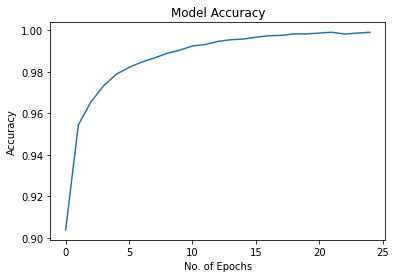

In [15]:
plt.figure()
plt.plot(history1.history['accuracy'])
plt.title('Model Accuracy')
plt.xlabel('No. of Epochs')
plt.ylabel('Accuracy')

Text(0, 0.5, 'Loss')

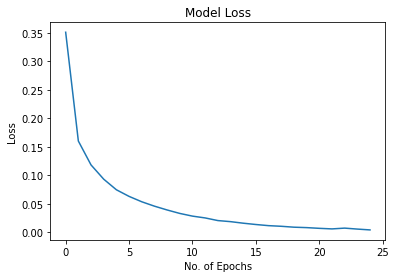

In [16]:
plt.figure()
plt.plot(history1.history['loss'])
plt.title('Model Loss')
plt.xlabel('No. of Epochs')
plt.ylabel('Loss')

## Question - 2
##### Implement a deep neural network that has 10 hidden layers and each layer has 10 neurons. Now compare the performance of this network with the previous net.  

In [17]:
model2 = Sequential()
model2.add(Flatten(input_shape=X_train[0].shape))
model2.add(Dense(10, activation='relu'))
model2.add(Dense(10, activation='relu'))
model2.add(Dense(10, activation='relu'))
model2.add(Dense(10, activation='relu'))
model2.add(Dense(10, activation='relu'))
model2.add(Dense(10, activation='relu'))
model2.add(Dense(10, activation='relu'))
model2.add(Dense(10, activation='relu'))
model2.add(Dense(10, activation='relu'))
model2.add(Dense(10, activation='relu'))
model2.add(Dense(10, activation='softmax'))

In [18]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                7850      
_________________________________________________________________
dense_3 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_4 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_5 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_6 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_7 (Dense)              (None, 10)               

In [19]:
model2.compile(optimizer='adam', metrics=['accuracy'], loss='sparse_categorical_crossentropy')

In [20]:
history2 = model2.fit(X_train, y_train, batch_size=100, epochs=25)

Epoch 1/25
600/600 [==============================] - 2s 3ms/step - loss: 1.2690 - accuracy: 0.5607
Epoch 2/25
600/600 [==============================] - 2s 3ms/step - loss: 0.5926 - accuracy: 0.8299
Epoch 3/25
600/600 [==============================] - 2s 3ms/step - loss: 0.4712 - accuracy: 0.8675
Epoch 4/25
600/600 [==============================] - 2s 3ms/step - loss: 0.4281 - accuracy: 0.8787
Epoch 5/25
600/600 [==============================] - 2s 3ms/step - loss: 0.4006 - accuracy: 0.8873
Epoch 6/25
600/600 [==============================] - 2s 3ms/step - loss: 0.3780 - accuracy: 0.8936
Epoch 7/25
600/600 [==============================] - 2s 3ms/step - loss: 0.3629 - accuracy: 0.8978
Epoch 8/25
600/600 [==============================] - 2s 3ms/step - loss: 0.3486 - accuracy: 0.9015
Epoch 9/25
600/600 [==============================] - 2s 3ms/step - loss: 0.3332 - accuracy: 0.9063
Epoch 10/25
600/600 [==============================] - 2s 3ms/step - loss: 0.3230 - accuracy: 0.9093

In [21]:
from sklearn.metrics import accuracy_score

y_pred_train = np.argmax(model2.predict(X_train), axis=-1)
y_pred_test = np.argmax(model2.predict(X_test), axis=-1)
print('Training accuracy:', 100*accuracy_score(y_train, y_pred_train))
print('Testing accuracy:', 100*accuracy_score(y_test, y_pred_test))

Training accuracy: 93.45833333333333
Testing accuracy: 92.36999999999999


Text(0, 0.5, 'Accuracy')

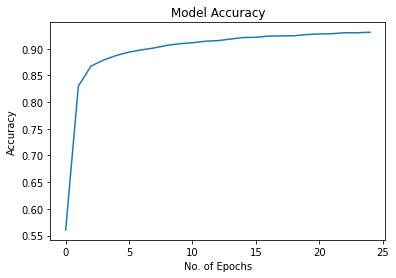

In [22]:
plt.figure()
plt.plot(history2.history['accuracy'])
plt.title('Model Accuracy')
plt.xlabel('No. of Epochs')
plt.ylabel('Accuracy')

Text(0, 0.5, 'Loss')

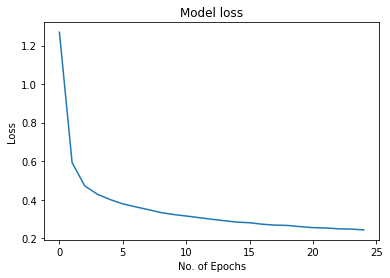

In [23]:
plt.figure()
plt.plot(history2.history['loss'])
plt.title('Model loss')
plt.xlabel('No. of Epochs')
plt.ylabel('Loss')

## Question - 3
##### Write another program which will assess the quality of the features generated by the 10 layer deep net (in item 2) in its different layers. For this, train the deep net first. Then generate the features from the hidden layer 5, 7 and 10 separately and use it in k-nearest neighbour to classify the images and compare the performances of the features generated from layers 5, 7 and 10. The features from a layer mean the activation values of the neurons in that particular layer. 

In [24]:
from keras import models
# Extracts the outputs of the top 5th, 7th and 10th hidden layers
layer_outputs = [layer.output for layer in model2.layers] 
# Creates a model that will return these outputs, given the model input
activation_model = models.Model(inputs=model2.input, outputs=layer_outputs) 

In [25]:
activations_train = activation_model.predict(X_train) 
activations_test = activation_model.predict(X_test) 

In [26]:
n_neighbors = 7
from sklearn.neighbors import KNeighborsClassifier

##### Using 5th hidden layer

In [27]:
knn5 = KNeighborsClassifier(n_neighbors=n_neighbors)
knn5.fit(activations_train[6], y_train)
knn5_train_pred = knn5.predict(activations_train[6])
knn5_test_pred = knn5.predict(activations_test[6])
print('Training accuracy from 5th hideden layer:', 100*accuracy_score(y_train, knn5_train_pred))
print('Testing accuracy from 5th hidden layer:',100*accuracy_score(y_test, knn5_test_pred) )

Training accuracy from 5th hideden layer: 94.39666666666666
Testing accuracy from 5th hidden layer: 92.55


##### Using 7th hidden layer

In [28]:
knn7 = KNeighborsClassifier(n_neighbors=n_neighbors)
knn7.fit(activations_train[8], y_train)
knn7_train_pred = knn7.predict(activations_train[8])
knn7_test_pred = knn7.predict(activations_test[8])
print('Training accuracy from 7th hidden layer:', 100*accuracy_score(y_train, knn7_train_pred))
print('Testing accuracy from 7th hidden layer:',100*accuracy_score(y_test, knn7_test_pred) )

Training accuracy from 7th hidden layer: 94.38666666666666
Testing accuracy from 7th hidden layer: 92.42


##### Using 10th hidden layer

In [29]:
knn10 = KNeighborsClassifier(n_neighbors=n_neighbors)
knn10.fit(activations_train[11], y_train)
knn10_train_pred = knn10.predict(activations_train[11])
knn10_test_pred = knn10.predict(activations_test[11])
print('Training accuracy from 10th layer:', 100*accuracy_score(y_train, knn10_train_pred))
print('Testing accuracy from 10th layer:',100*accuracy_score(y_test, knn10_test_pred) )

Training accuracy from 10th layer: 94.195
Testing accuracy from 10th layer: 92.31
